## **Importing Libraries**

In [10]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")
sns.set(style='whitegrid')

## **Building Machine Learning Model**

In [11]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, cross_val_score
import statsmodels.api as sm
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_absolute_error
from sklearn.ensemble import RandomForestRegressor

In [12]:
df_final = pd.read_csv('delaney_mordred_truncated.csv')

In [13]:
df_final.head()

,Compound ID,SMILES,measured log(solubility:mol/L),ABC,nBase,SpMAD_A,VR1_A,nAromAtom,nSpiro,nBridgehead,...,JGI3,JGI4,JGI5,JGI6,JGI7,JGI8,JGI9,JGI10,Lipinski,GhoseFilter
0,"1,1,1,2-Tetrachloroethane",ClCC(Cl)(Cl)Cl,-2.18,4.012290,0,0.969771,11.637367,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,0
1,"1,1,1-Trichloroethane",CC(Cl)(Cl)Cl,-2.00,3.464102,0,0.800000,8.000000,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,0
2,"1,1,2,2-Tetrachloroethane",ClC(Cl)C(Cl)Cl,-1.74,3.932653,0,1.000000,11.530010,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,0
3,"1,1,2-Trichloroethane",ClCC(Cl)Cl,-1.48,3.047207,0,1.045250,8.629874,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,0
4,"1,1,2-Trichlorotrifluoroethane",FC(F)(Cl)C(F)(Cl)Cl,-3.04,5.808525,0,0.901388,17.881697,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,0


In [14]:
y = df_final['measured log(solubility:mol/L)']

**Scaling the Datset**

In [15]:
scaled_DF = pd.DataFrame(StandardScaler().fit_transform(df_final.iloc[:,3:]), columns=([df_final.iloc[:,3:].columns]))

In [16]:
scaled_DF

,ABC,nBase,SpMAD_A,VR1_A,nAromAtom,nSpiro,nBridgehead,nHetero,nN,nO,...,JGI3,JGI4,JGI5,JGI6,JGI7,JGI8,JGI9,JGI10,Lipinski,GhoseFilter
0,-1.046794,-0.077041,-2.070914,-0.054329,-0.998199,-0.083918,-0.115751,0.221643,-0.665609,-0.840065,...,-1.863644,-1.447338,-1.141275,-0.938260,-0.792040,-0.635966,-0.468026,-0.363983,0.332685,-0.836571
1,-1.143958,-0.077041,-3.581231,-0.054800,-0.998199,-0.083918,-0.115751,-0.134981,-0.665609,-0.840065,...,-1.863644,-1.447338,-1.141275,-0.938260,-0.792040,-0.635966,-0.468026,-0.363983,0.332685,-0.836571
2,-1.060909,-0.077041,-1.801990,-0.054342,-0.998199,-0.083918,-0.115751,0.221643,-0.665609,-0.840065,...,-1.863644,-1.447338,-1.141275,-0.938260,-0.792040,-0.635966,-0.468026,-0.363983,0.332685,-0.836571
3,-1.217850,-0.077041,-1.399434,-0.054718,-0.998199,-0.083918,-0.115751,-0.134981,-0.665609,-0.840065,...,-1.863644,-1.447338,-1.141275,-0.938260,-0.792040,-0.635966,-0.468026,-0.363983,0.332685,-0.836571
4,-0.728421,-0.077041,-2.679264,-0.053520,-0.998199,-0.083918,-0.115751,0.934889,-0.665609,-0.840065,...,-1.863644,-1.447338,-1.141275,-0.938260,-0.792040,-0.635966,-0.468026,-0.363983,0.332685,-0.836571
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1139,0.181790,-0.077041,-0.034574,-0.043812,-0.998199,-0.083918,-0.115751,1.648136,0.106660,1.294381,...,-0.238822,-0.483302,-0.067147,0.924116,1.707763,0.978429,0.678936,-0.363983,0.332685,1.195355
1140,0.696636,-0.077041,-0.076533,-0.042132,0.149864,-0.083918,-0.115751,0.934889,0.106660,0.760769,...,1.635311,0.094811,0.667960,1.076249,1.045923,0.342555,-0.468026,-0.363983,0.332685,1.195355
1141,1.409871,-0.077041,0.691743,-0.033104,2.063300,-0.083918,-0.115751,0.221643,-0.665609,1.294381,...,0.091029,0.186854,0.496599,0.214640,0.943934,0.362070,1.330076,-0.363983,0.332685,1.195355
1142,1.384679,-0.077041,-0.199625,-0.036134,1.297926,-0.083918,-0.115751,1.648136,0.878928,1.294381,...,0.640781,0.227942,1.205983,0.236964,0.969974,2.847035,0.695862,3.315455,0.332685,1.195355


**Train-Test Split**

In [17]:
X_train, X_test, y_train, y_test = train_test_split(scaled_DF, y, test_size=0.20, random_state=45)

In [18]:
lr = LinearRegression()
lr.fit(X_train, y_train)

LinearRegression()

In [19]:
print(f'The r2 score for train set is : {lr.score(X_train, y_train)}')
print(f'The r2 score for test set is : {lr.score(X_test, y_test)}')

The r2 score for train set is : 0.9526138008130901
The r2 score for test set is : 0.6235904754965749


In [20]:
rf = RandomForestRegressor()
rf.fit(X_train, y_train)

RandomForestRegressor()

In [21]:
print(f'The r2 score for train set is : {rf.score(X_train, y_train)}')
print(f'The r2 score for test set is : {rf.score(X_test, y_test)}')

The r2 score for train set is : 0.984588294197752
The r2 score for test set is : 0.8683930262393259


**Scikit Learn's Feature Importance Algorithm**



> In scikit-learn, the feature importance in a Random Forest regression model can be obtained through the feature_importances_ attribute. This attribute provides a relative importance score for each feature in the dataset based on how much each feature contributes to reducing the impurity (e.g., mean squared error) in the construction of the decision trees within the Random Forest.



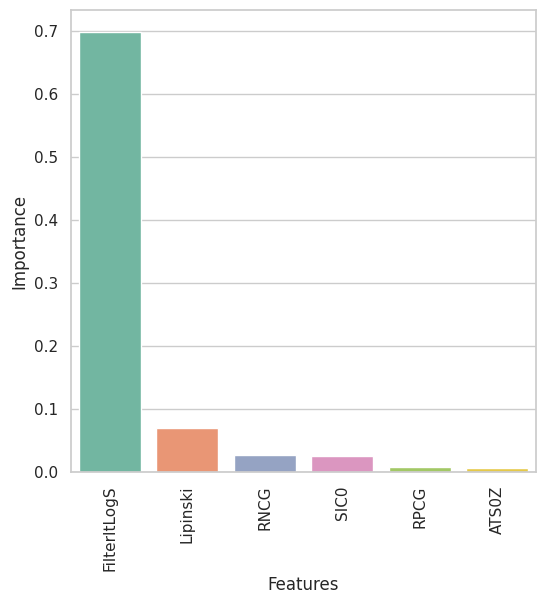

In [22]:
# get importance
importance = rf.feature_importances_
# summarize feature importance
dicts = {
    'Features':[x for x in df_final.iloc[:,3:].columns],
    'Importance':importance
    }
DF_imp = pd.DataFrame(dicts)
DF_imp = DF_imp.sort_values('Importance',ascending=False)
DF_imp.to_excel('imp.xlsx', index=None)

# plot feature importance
top_desc_fi = DF_imp[:6]
plt.subplots(figsize=(6,6))
sns.barplot(data=top_desc_fi, x = 'Features', y='Importance', palette = 'Set2')
# plt.bar('Feature','Importance',data = DF_imp.iloc[:7,:])
plt.xticks(rotation = 90)
# plt.show()
# plt.savefig('fi.png', dpi=300, bbox_inches='tight')

**Scikit Learn's Permutation Importance**


> Permutation importance works by permuting the values of a single feature and measuring the change in the model's performance (e.g., accuracy or mean squared error). The idea is that important features, when permuted, will cause a significant drop in model performance. Scikit-learn provides the permutation_importance function to calculate and extract permutation importance.



In [23]:
from sklearn.inspection import permutation_importance

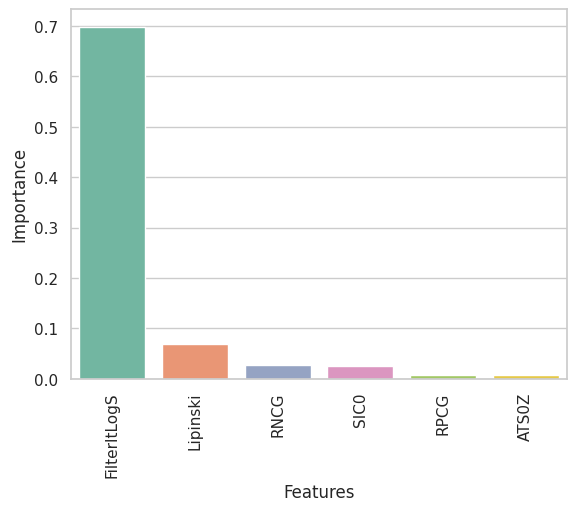

In [24]:
result = permutation_importance(
    rf, X_test, y_test, random_state=42)

dicts = {
    'Features':[x for x in df_final.iloc[:,3:].columns],
    'Importance':result.importances_mean
}
DF_pi = pd.DataFrame(dicts)
DF_pi = DF_imp.sort_values('Importance',ascending=False)
DF_pi.to_excel('imp.xlsx', index=None)

# plot feature importance
top_desc_pi = DF_pi[:6]
sns.barplot(data=top_desc_pi, x = 'Features', y='Importance', palette = 'Set2')
# plt.bar('Feature','Importance',data = DF_imp.iloc[:7,:])
plt.xticks(rotation = 90)
plt.show()

In [25]:
DF_pi.head()

,Features,Importance
153,FilterItLogS,0.698873
279,Lipinski,0.069737
96,RNCG,0.026228
151,SIC0,0.024128
97,RPCG,0.006766


**SHAP Feature Importance**


> SHAP feature importance is based on Shapley values from cooperative game theory, and it is used to explain the output of a model by assigning a value to each feature indicating its contribution to the model's prediction for a particular instance. SHAP values consider all possible combinations of features and calculate the average contribution of each feature to the prediction.



In [26]:
%%capture
!pip install shap
import shap

In [27]:
explainer = shap.TreeExplainer(rf)
shap_values = explainer.shap_values(X_test)

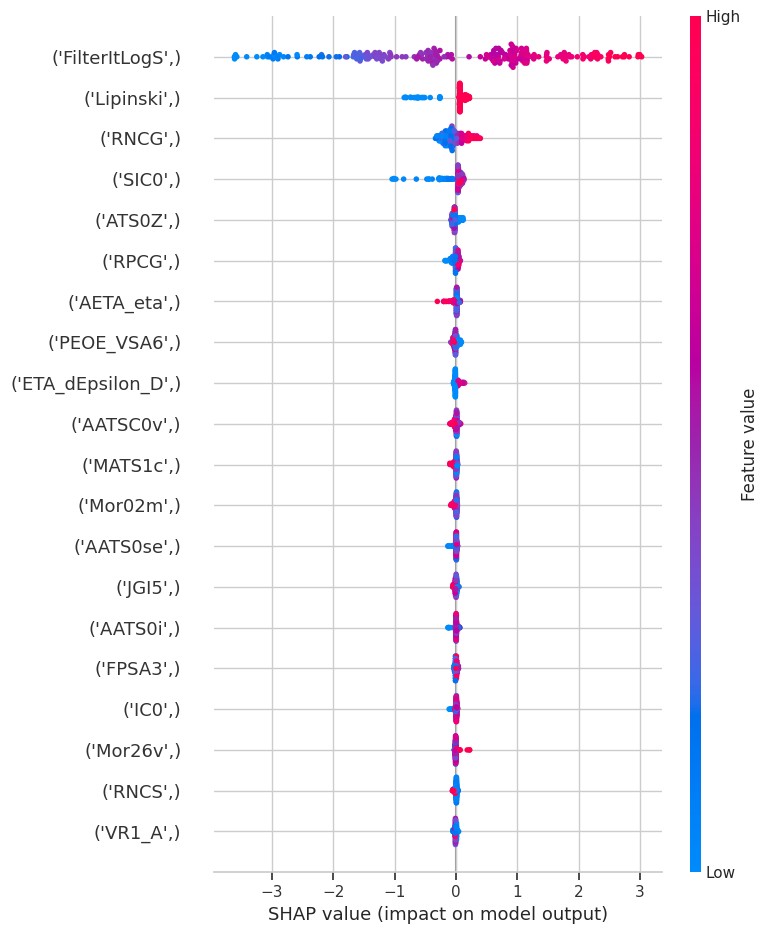

In [28]:
shap.summary_plot(shap_values, X_test)

## **Model Evalualtion with Reduced Features**

In [29]:
top_desc_pi['Features'][:5]

153    FilterItLogS
279        Lipinski
96             RNCG
151            SIC0
97             RPCG
Name: Features, dtype: object

In [30]:
scaled_DF_5 = scaled_DF[top_desc_pi['Features'][:5]]

In [31]:
scaled_DF_5.head()

,FilterItLogS,Lipinski,RNCG,SIC0,RPCG
0,0.021772,0.332685,0.033750,1.784579,3.187876
1,0.376467,0.332685,-0.070165,1.993944,4.534268
2,0.213155,0.332685,-0.406439,1.784579,1.169029
3,0.367089,0.332685,0.263581,1.993944,1.436776
4,0.089296,0.332685,-0.255165,1.993944,3.019216


In [32]:
y

0      -2.180
1      -2.000
2      -1.740
3      -1.480
4      -3.040
        ...  
1139    1.144
1140   -4.925
1141   -3.893
1142   -3.790
1143   -2.581
Name: measured log(solubility:mol/L), Length: 1144, dtype: float64

In [33]:
X_train, X_test, y_train, y_test = train_test_split(scaled_DF_5, y, test_size=0.20, random_state=45)

In [34]:
lr = LinearRegression()
lr.fit(X_train, y_train)

LinearRegression()

In [35]:
print(f'The r2 score for train set is : {lr.score(X_train, y_train)}')
print(f'The r2 score for test set is : {lr.score(X_test, y_test)}')

The r2 score for train set is : 0.8288191853853211
The r2 score for test set is : 0.8225242453242801


In [36]:
rf = RandomForestRegressor()
rf.fit(X_train, y_train)

RandomForestRegressor()

In [37]:
print(f'The r2 score for train set is : {rf.score(X_train, y_train)}')
print(f'The r2 score for test set is : {rf.score(X_test, y_test)}')

The r2 score for train set is : 0.9808214703625006
The r2 score for test set is : 0.8454505732193738
